In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings  
warnings.filterwarnings('ignore')

In [2]:
df_v2 = pd.DataFrame(pd.read_csv("data/train.csv"))
df_test=pd.DataFrame(pd.read_csv("data/test.csv"))

In [3]:
targets = ['CPULOAD']
features = [feature for feature in df_v2.columns if feature not in targets]
df_v2.head()

,DATETIME,SERVER,CPU,CPULOAD
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28


In [4]:
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'], format='%Y-%m-%d %H:%M:%S%z')
df_v2.head()

,DATETIME,SERVER,CPU,CPULOAD
0,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88
1,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
2,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31
3,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25
4,2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28


# Her Bir CPU'nun CPULOAD Değerinin Verilen Zaman Dilimi Boyunca Değişiminin Görselleştirilmesi

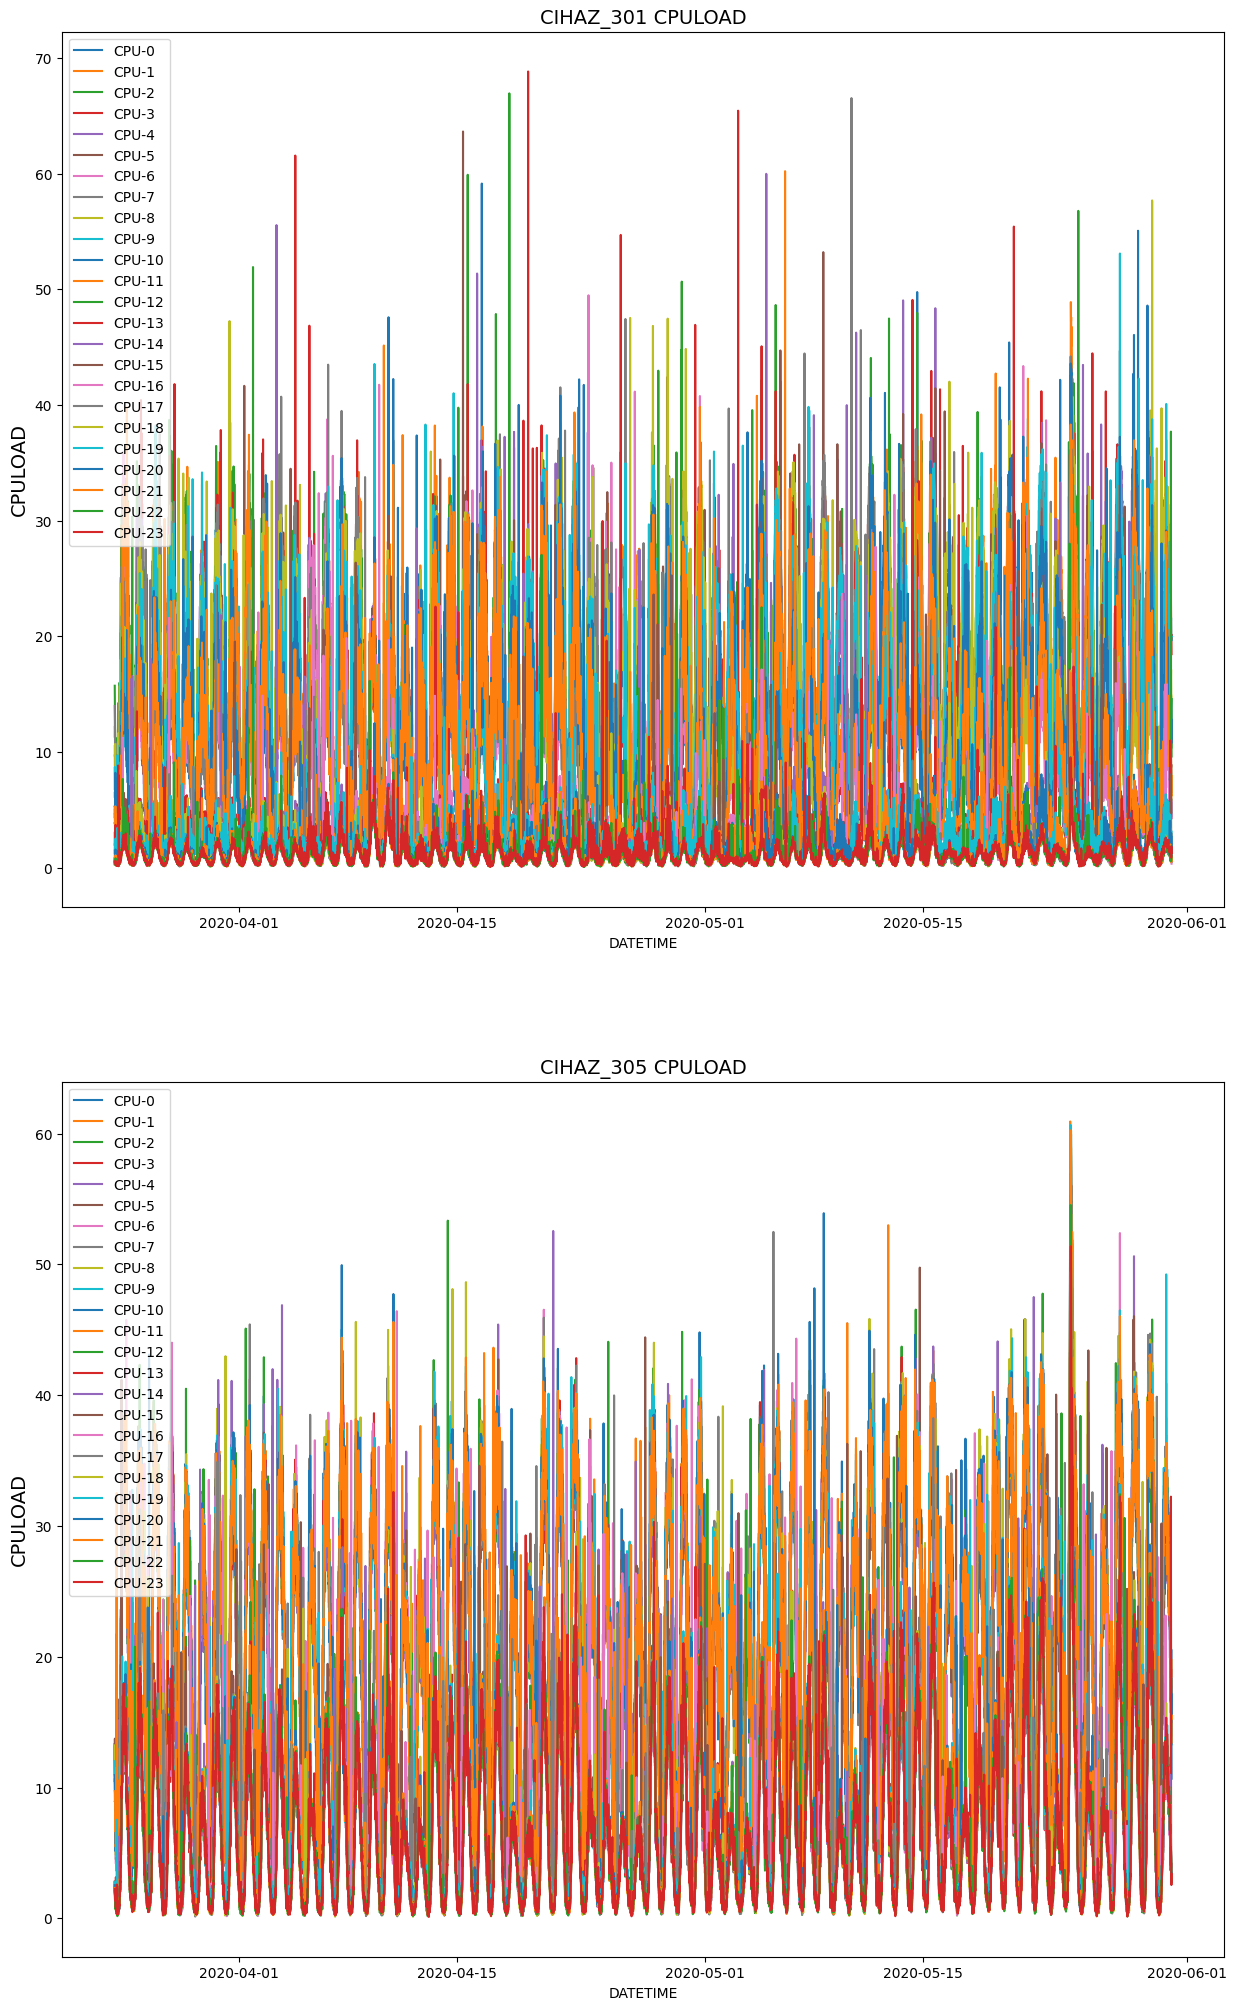

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri okuma
df_v2 = pd.read_csv('data/train.csv')

# Veri zaman serisine çevirme
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])
df_v2 = df_v2.set_index('DATETIME')

# Veriyi cihaz ve CPU'lara göre ayırma
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# CPU'ları ayırma
df_cihaz301_CPUs = [df_cihaz301[df_cihaz301['CPU'] == f'CPU-{i}'] for i in range(24)]
df_cihaz305_CPUs = [df_cihaz305[df_cihaz305['CPU'] == f'CPU-{i}'] for i in range(24)]

# Grafikleri çizme
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 25))

for i in range(24):
    sns.lineplot(x=df_cihaz301_CPUs[i].index, y=df_cihaz301_CPUs[i]['CPULOAD'].fillna(np.inf), ax=ax[0], label=f'CPU-{i}')
    sns.lineplot(x=df_cihaz305_CPUs[i].index, y=df_cihaz305_CPUs[i]['CPULOAD'].fillna(np.inf), ax=ax[1], label=f'CPU-{i}')

ax[0].set_title('CIHAZ_301 CPULOAD', fontsize=14)
ax[0].set_ylabel(ylabel='CPULOAD', fontsize=14)
ax[1].set_title('CIHAZ_305 CPULOAD', fontsize=14)
ax[1].set_ylabel(ylabel='CPULOAD', fontsize=14)

plt.show()


# Server'ların Hareketli Ortalamasının Hesaplanması ve Görselleştirilmesi

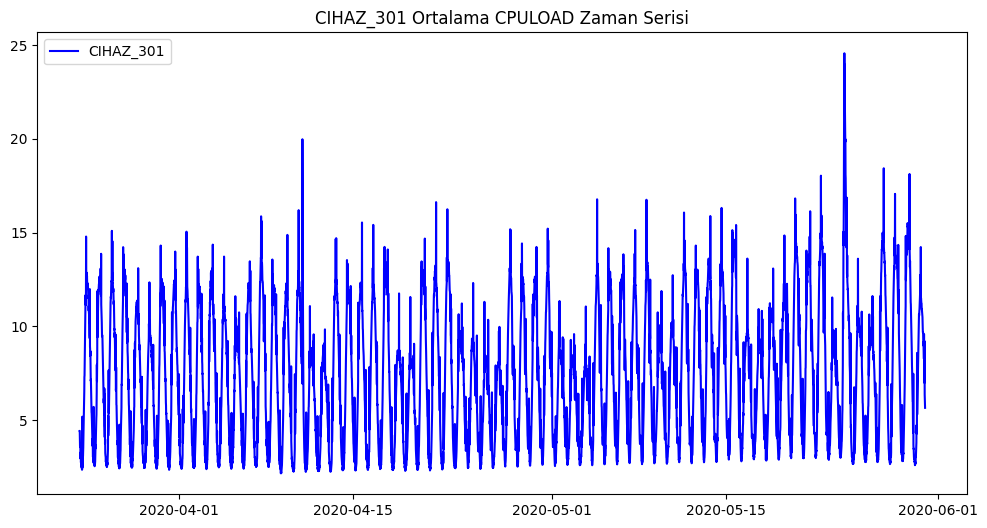

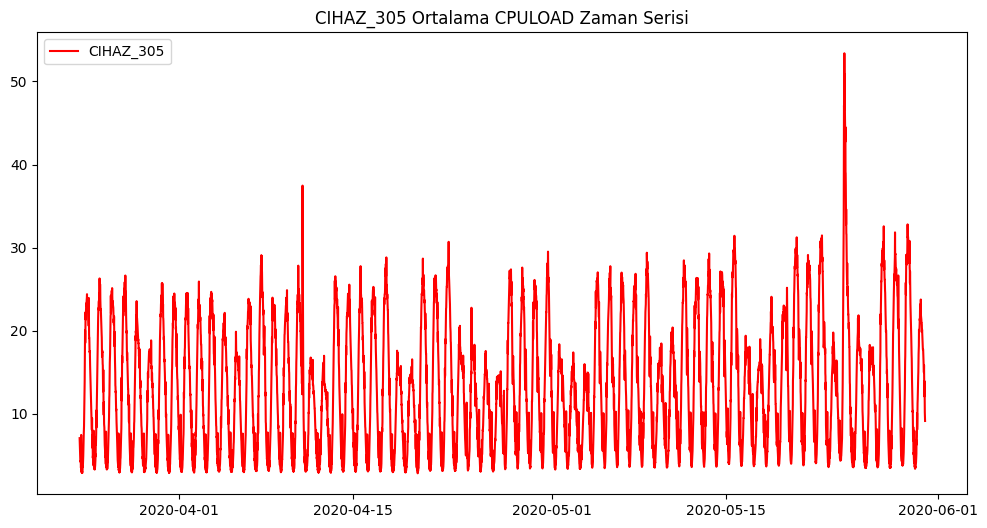

In [6]:
# Veriyi oku ve işle
df_v2 = pd.read_csv('data/train.csv')
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])

# SERVER ve DATETIME'a göre grupla ve CPULOAD değerlerinin ortalamasını al
df_avg = df_v2.groupby(['SERVER', 'DATETIME'])['CPULOAD'].mean().reset_index()

# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301_avg = df_avg[df_avg['SERVER'] == 'CIHAZ_301']
df_cihaz305_avg = df_avg[df_avg['SERVER'] == 'CIHAZ_305']

# CIHAZ_301 için zaman serisini çiz
plt.figure(figsize=(12,6))
plt.plot(df_cihaz301_avg['DATETIME'], df_cihaz301_avg['CPULOAD'], color='blue', label='CIHAZ_301')
plt.title('CIHAZ_301 Ortalama CPULOAD Zaman Serisi')
plt.legend()
plt.show()

# CIHAZ_305 için zaman serisini çiz
plt.figure(figsize=(12,6))
plt.plot(df_cihaz305_avg['DATETIME'], df_cihaz305_avg['CPULOAD'], color='red', label='CIHAZ_305')
plt.title('CIHAZ_305 Ortalama CPULOAD Zaman Serisi')
plt.legend()
plt.show()


# Server'ların Hareketli Standart Sapmasının Hesaplanması ve Görselleştirilmesi

Veri serilerinin değişkenliğini ve dalgalanmalarını anlamak, anormallikleri tespit etmek ve trendleri analiz etmek için standart sapma grafiği çizdirildi. 

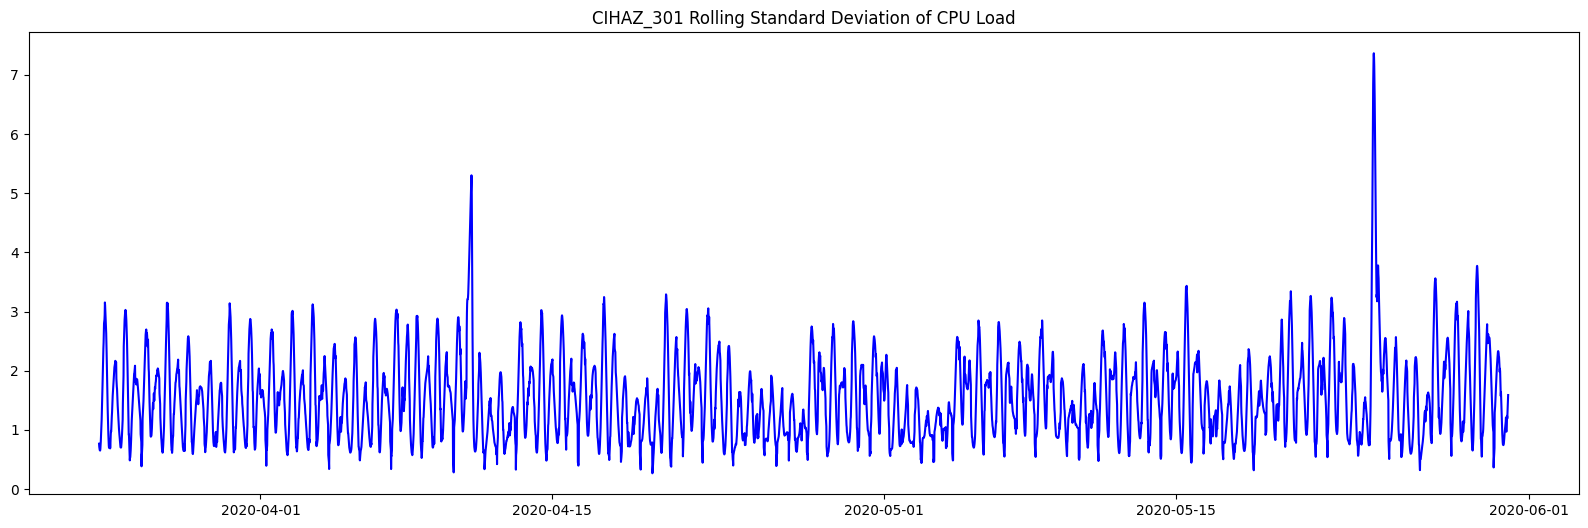

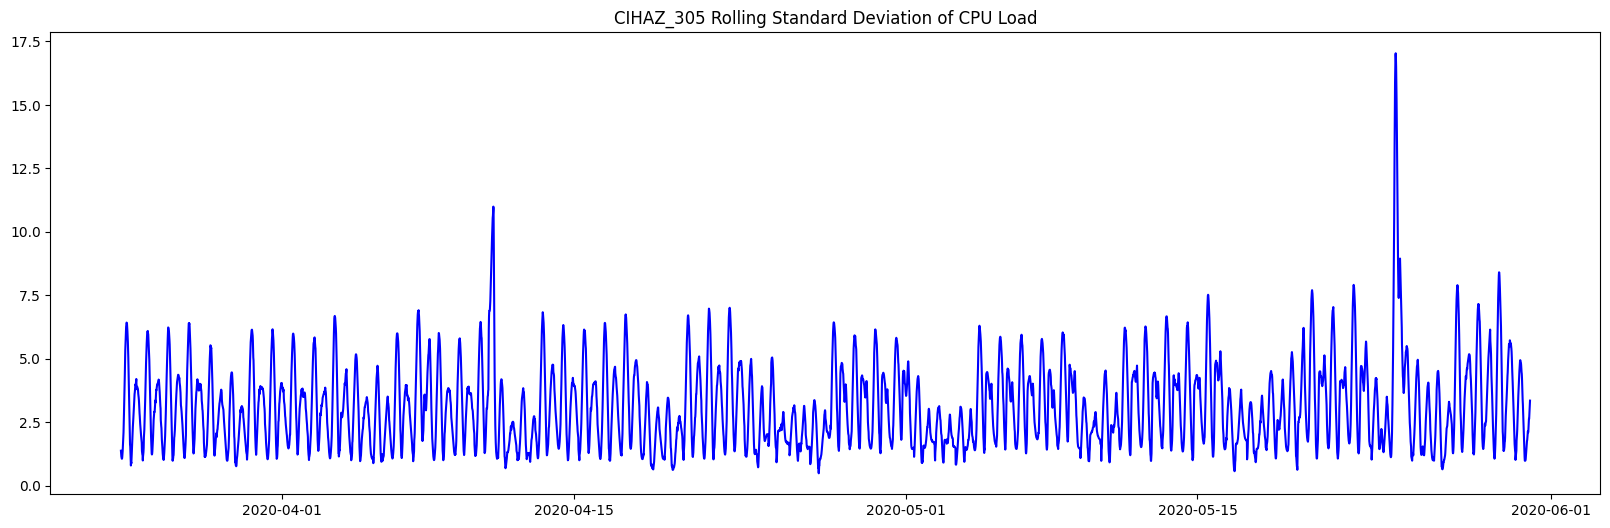

In [7]:
# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# Belirli bir pencere boyutu seçin (örneğin, 24 saat)
window_size = 24

# CIHAZ_301 ve CIHAZ_305 için tüm CPU'ların ortalama değerlerini hesapla
avg_cihaz301 = df_cihaz301.groupby('DATETIME')['CPULOAD'].mean()
avg_cihaz305 = df_cihaz305.groupby('DATETIME')['CPULOAD'].mean()

# Hareketli standart sapmayı hesapla
rolstd_cihaz301 = avg_cihaz301.rolling(window=window_size).std()
rolstd_cihaz305 = avg_cihaz305.rolling(window=window_size).std()

# CIHAZ_301 için grafikleri çiz
plt.figure(figsize=(20,6))
plt.plot(rolstd_cihaz301, color='blue')
plt.title('CIHAZ_301 Rolling Standard Deviation of CPU Load')
plt.show()

# CIHAZ_305 için grafikleri çiz
plt.figure(figsize=(20,6))
plt.plot(rolstd_cihaz305, color='blue')
plt.title('CIHAZ_305 Rolling Standard Deviation of CPU Load')
plt.show()


# Hareketli Ortalama ve Standart Sapmanın Karşılaştırılarak Verinin Görsel Olarak Durağanlık Analizinin Yapılması

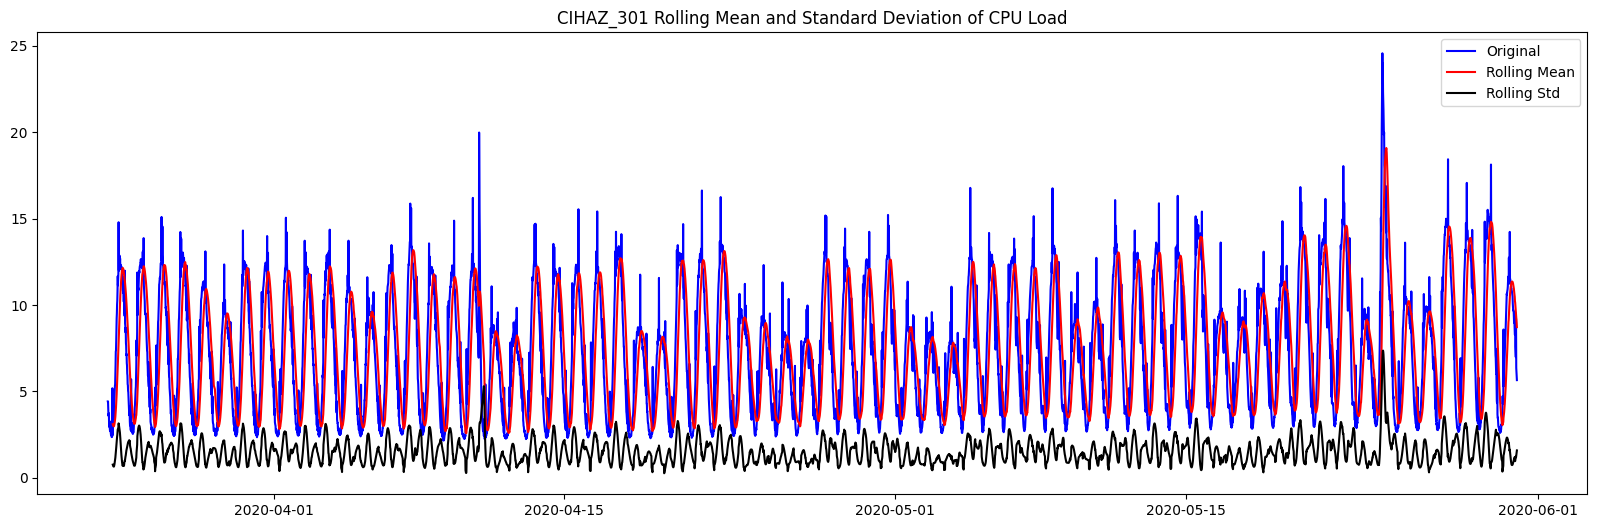

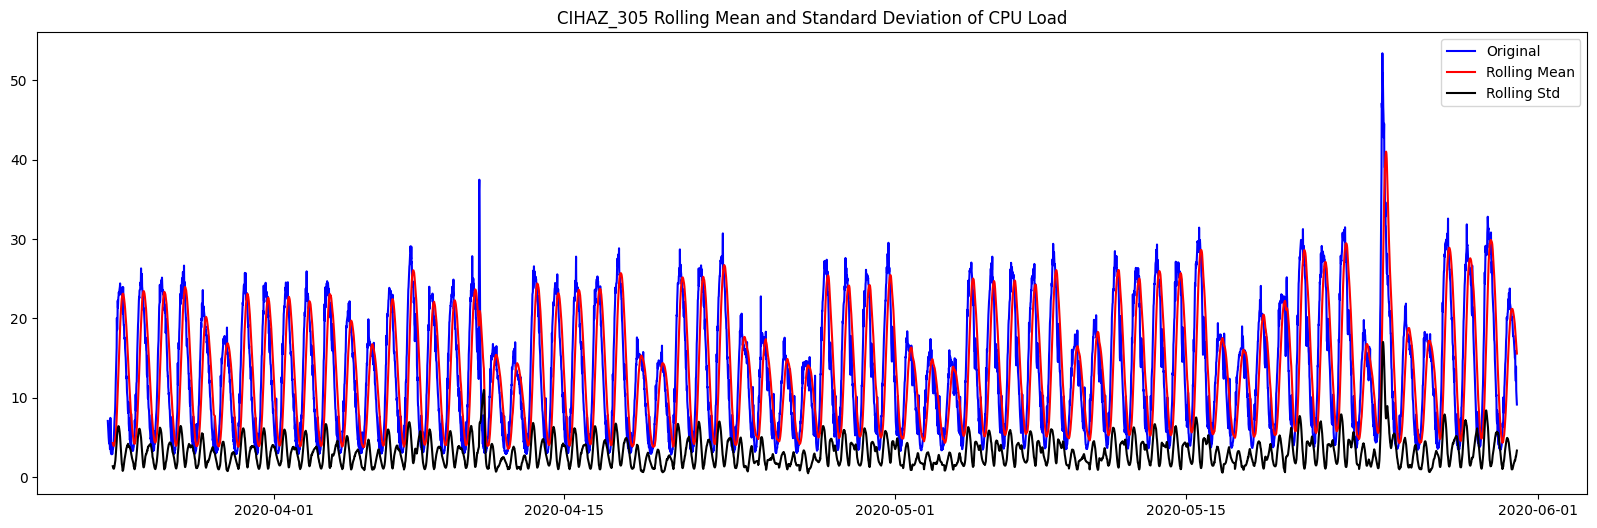

In [10]:
# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# Belirli bir pencere boyutu seçin (örneğin, 24 saat)
window_size = 24

# CIHAZ_301 ve CIHAZ_305 için tüm CPU'ların değerlerini grupla ve ortalama al
avg_cpu_cihaz301 = df_cihaz301.groupby('DATETIME')['CPULOAD'].mean()
avg_cpu_cihaz305 = df_cihaz305.groupby('DATETIME')['CPULOAD'].mean()

# Hareketli ortalamayı ve standart sapmayı hesapla
rolmean_cihaz301 = avg_cpu_cihaz301.rolling(window=window_size).mean()
rolstd_cihaz301 = avg_cpu_cihaz301.rolling(window=window_size).std()

rolmean_cihaz305 = avg_cpu_cihaz305.rolling(window=window_size).mean()
rolstd_cihaz305 = avg_cpu_cihaz305.rolling(window=window_size).std()

# CIHAZ_301 için grafikleri çiz
plt.figure(figsize=(20,6))
plt.plot(avg_cpu_cihaz301, color='blue', label='Original')
plt.plot(rolmean_cihaz301, color='red', label='Rolling Mean')
plt.plot(rolstd_cihaz301, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('CIHAZ_301 Rolling Mean and Standard Deviation of CPU Load')
plt.show()

# CIHAZ_305 için grafikleri çiz
plt.figure(figsize=(20,6))
plt.plot(avg_cpu_cihaz305, color='blue', label='Original')
plt.plot(rolmean_cihaz305, color='red', label='Rolling Mean')
plt.plot(rolstd_cihaz305, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('CIHAZ_305 Rolling Mean and Standard Deviation of CPU Load')
plt.show()


# Adfuller Testinin Yapılması

 adfuller fonksiyonu kullanılarak ADF (Augmented Dickey-Fuller) testi yapılır. Bu test, bir zaman serisinin durağanlık özelliğini değerlendirmek için kullanılır. result_cihaz301 ve result_cihaz305 değişkenleri, ADF testi sonuçlarını içerir.
 
 ADF istatistiği, kritik değerlerle karşılaştırılır ve durağanlık hipotezi test edilir. ADF istatistiği, kritik değerlerin altında ise zaman serisi durağan olarak kabul edilir.

In [13]:
from statsmodels.tsa.stattools import adfuller

# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# CIHAZ_301 ve CIHAZ_305 için tüm CPU'ların değerlerini grupla ve ortalama al
avg_cpu_cihaz301 = df_cihaz301.groupby(['DATETIME'])['CPULOAD'].mean().reset_index()
avg_cpu_cihaz305 = df_cihaz305.groupby(['DATETIME'])['CPULOAD'].mean().reset_index()

# CIHAZ_301 ve CIHAZ_305 için ADF testini gerçekleştir
result_cihaz301 = adfuller(avg_cpu_cihaz301['CPULOAD'].values)
result_cihaz305 = adfuller(avg_cpu_cihaz305['CPULOAD'].values)

print("CIHAZ_301")
print(f"ADF Statistic: {result_cihaz301[0]}")
print(f"p-value: {result_cihaz301[1]}")
print(f"Critical Value (1%): {result_cihaz301[4]['1%']}")
print(f"Critical Value (5%): {result_cihaz301[4]['5%']}")
print(f"Critical Value (10%): {result_cihaz301[4]['10%']}")
print("-" * 50)

print("CIHAZ_305")
print(f"ADF Statistic: {result_cihaz305[0]}")
print(f"p-value: {result_cihaz305[1]}")
print(f"Critical Value (1%): {result_cihaz305[4]['1%']}")
print(f"Critical Value (5%): {result_cihaz305[4]['5%']}")
print(f"Critical Value (10%): {result_cihaz305[4]['10%']}")
print("-" * 50)


CIHAZ_301
ADF Statistic: -18.64169068699347
p-value: 2.053849745991242e-30
Critical Value (1%): -3.4313597071653335
Critical Value (5%): -2.861986203804562
Critical Value (10%): -2.5670075109669024
--------------------------------------------------
CIHAZ_305
ADF Statistic: -17.771059425170673
p-value: 3.3073535396207276e-30
Critical Value (1%): -3.4313598630942765
Critical Value (5%): -2.861986272700051
Critical Value (10%): -2.567007547641477
--------------------------------------------------


# Adfuller Testinin Sonuçlarının Görselleştirilmesi

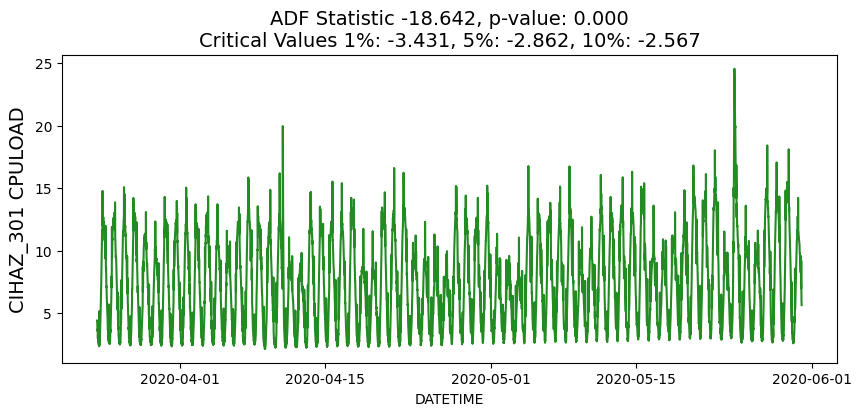

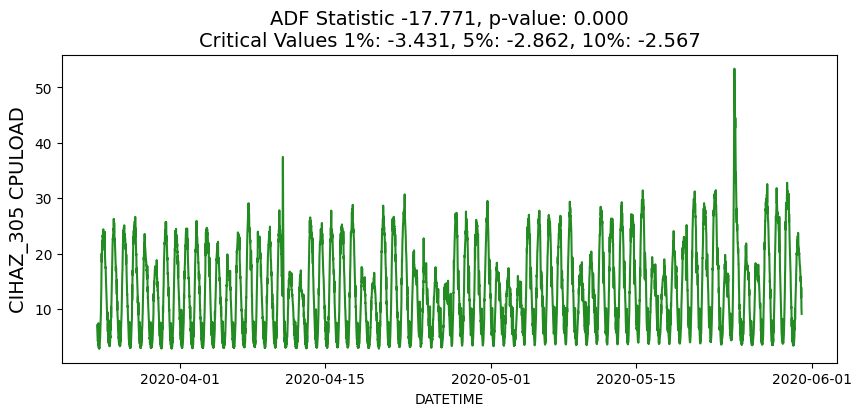

In [14]:
def visualize_adfuller_results(series, title):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'gold'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'indianred'
    plt.figure(figsize=(10, 4))
    sns.lineplot(x=series.index, y=series, color=linecolor)
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=title, fontsize=14)
    plt.show()

# CIHAZ_301 ve CIHAZ_305 için veriyi ayır
df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

# CIHAZ_301 ve CIHAZ_305 için tüm CPU'ların değerlerini grupla ve ortalama al
avg_cpu_cihaz301 = df_cihaz301.groupby(['DATETIME'])['CPULOAD'].mean()
avg_cpu_cihaz305 = df_cihaz305.groupby(['DATETIME'])['CPULOAD'].mean()

# CIHAZ_301 ve CIHAZ_305 için ADF testini gerçekleştir
visualize_adfuller_results(avg_cpu_cihaz301, 'CIHAZ_301 CPULOAD')
visualize_adfuller_results(avg_cpu_cihaz305, 'CIHAZ_305 CPULOAD')


# Feature Engineering

In [8]:
df_v2 = pd.read_csv('data/train.csv')
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])

df_v2['year'] = df_v2['DATETIME'].dt.year
df_v2['month'] = df_v2['DATETIME'].dt.month
df_v2['day'] = df_v2['DATETIME'].dt.day
df_v2['day_of_year'] = df_v2['DATETIME'].dt.dayofyear
df_v2['week_of_year'] = df_v2['DATETIME'].dt.isocalendar().week
df_v2['quarter'] = df_v2['DATETIME'].dt.quarter
df_v2['season'] = df_v2['month'] % 12 // 3 + 1

df_v2[['DATETIME', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()


,DATETIME,year,month,day,day_of_year,week_of_year,quarter,season
0,2020-03-24 00:00:00+03:00,2020,3,24,84,13,1,2
1,2020-03-24 00:00:00+03:00,2020,3,24,84,13,1,2
2,2020-03-24 00:00:00+03:00,2020,3,24,84,13,1,2
3,2020-03-24 00:00:00+03:00,2020,3,24,84,13,1,2
4,2020-03-24 00:00:00+03:00,2020,3,24,84,13,1,2


In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_v2 = pd.read_csv('data/train.csv')
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])
df_v2 = df_v2.set_index('DATETIME')

df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

df_results = pd.DataFrame()

for i in range(24):
    df_cpu_cihaz301 = df_cihaz301[df_cihaz301['CPU'] == f'CPU-{i}'].copy()
    df_cpu_cihaz305 = df_cihaz305[df_cihaz305['CPU'] == f'CPU-{i}'].copy()

    avg_cpu_cihaz301 = df_cpu_cihaz301.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean()
    avg_cpu_cihaz305 = df_cpu_cihaz305.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean()

    avg_cpu_cihaz301 = avg_cpu_cihaz301.interpolate()
    avg_cpu_cihaz305 = avg_cpu_cihaz305.interpolate()

    decomp_cihaz301 = seasonal_decompose(avg_cpu_cihaz301, period=52, model='additive', extrapolate_trend='freq')
    df_cpu_cihaz301[f"CPULOAD_trend"] = decomp_cihaz301.trend
    df_cpu_cihaz301[f"CPULOAD_seasonal"] = decomp_cihaz301.seasonal

    decomp_cihaz305 = seasonal_decompose(avg_cpu_cihaz305, period=52, model='additive', extrapolate_trend='freq')
    df_cpu_cihaz305[f"CPULOAD_trend"] = decomp_cihaz305.trend
    df_cpu_cihaz305[f"CPULOAD_seasonal"] = decomp_cihaz305.seasonal

    df_results = pd.concat([df_results, df_cpu_cihaz301, df_cpu_cihaz305])

df_results.head()


,SERVER,CPU,CPULOAD,CPULOAD_trend,CPULOAD_seasonal
DATETIME,,,,,
2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88,4.073698,-0.020915
2020-03-24 00:15:00+03:00,CIHAZ_301,CPU-0,3.92,4.197947,0.349345
2020-03-24 00:30:00+03:00,CIHAZ_301,CPU-0,3.62,4.322197,0.087600
2020-03-24 00:45:00+03:00,CIHAZ_301,CPU-0,3.07,4.446446,0.047912
2020-03-24 01:00:00+03:00,CIHAZ_301,CPU-0,3.11,4.570696,0.092475


# Decompose

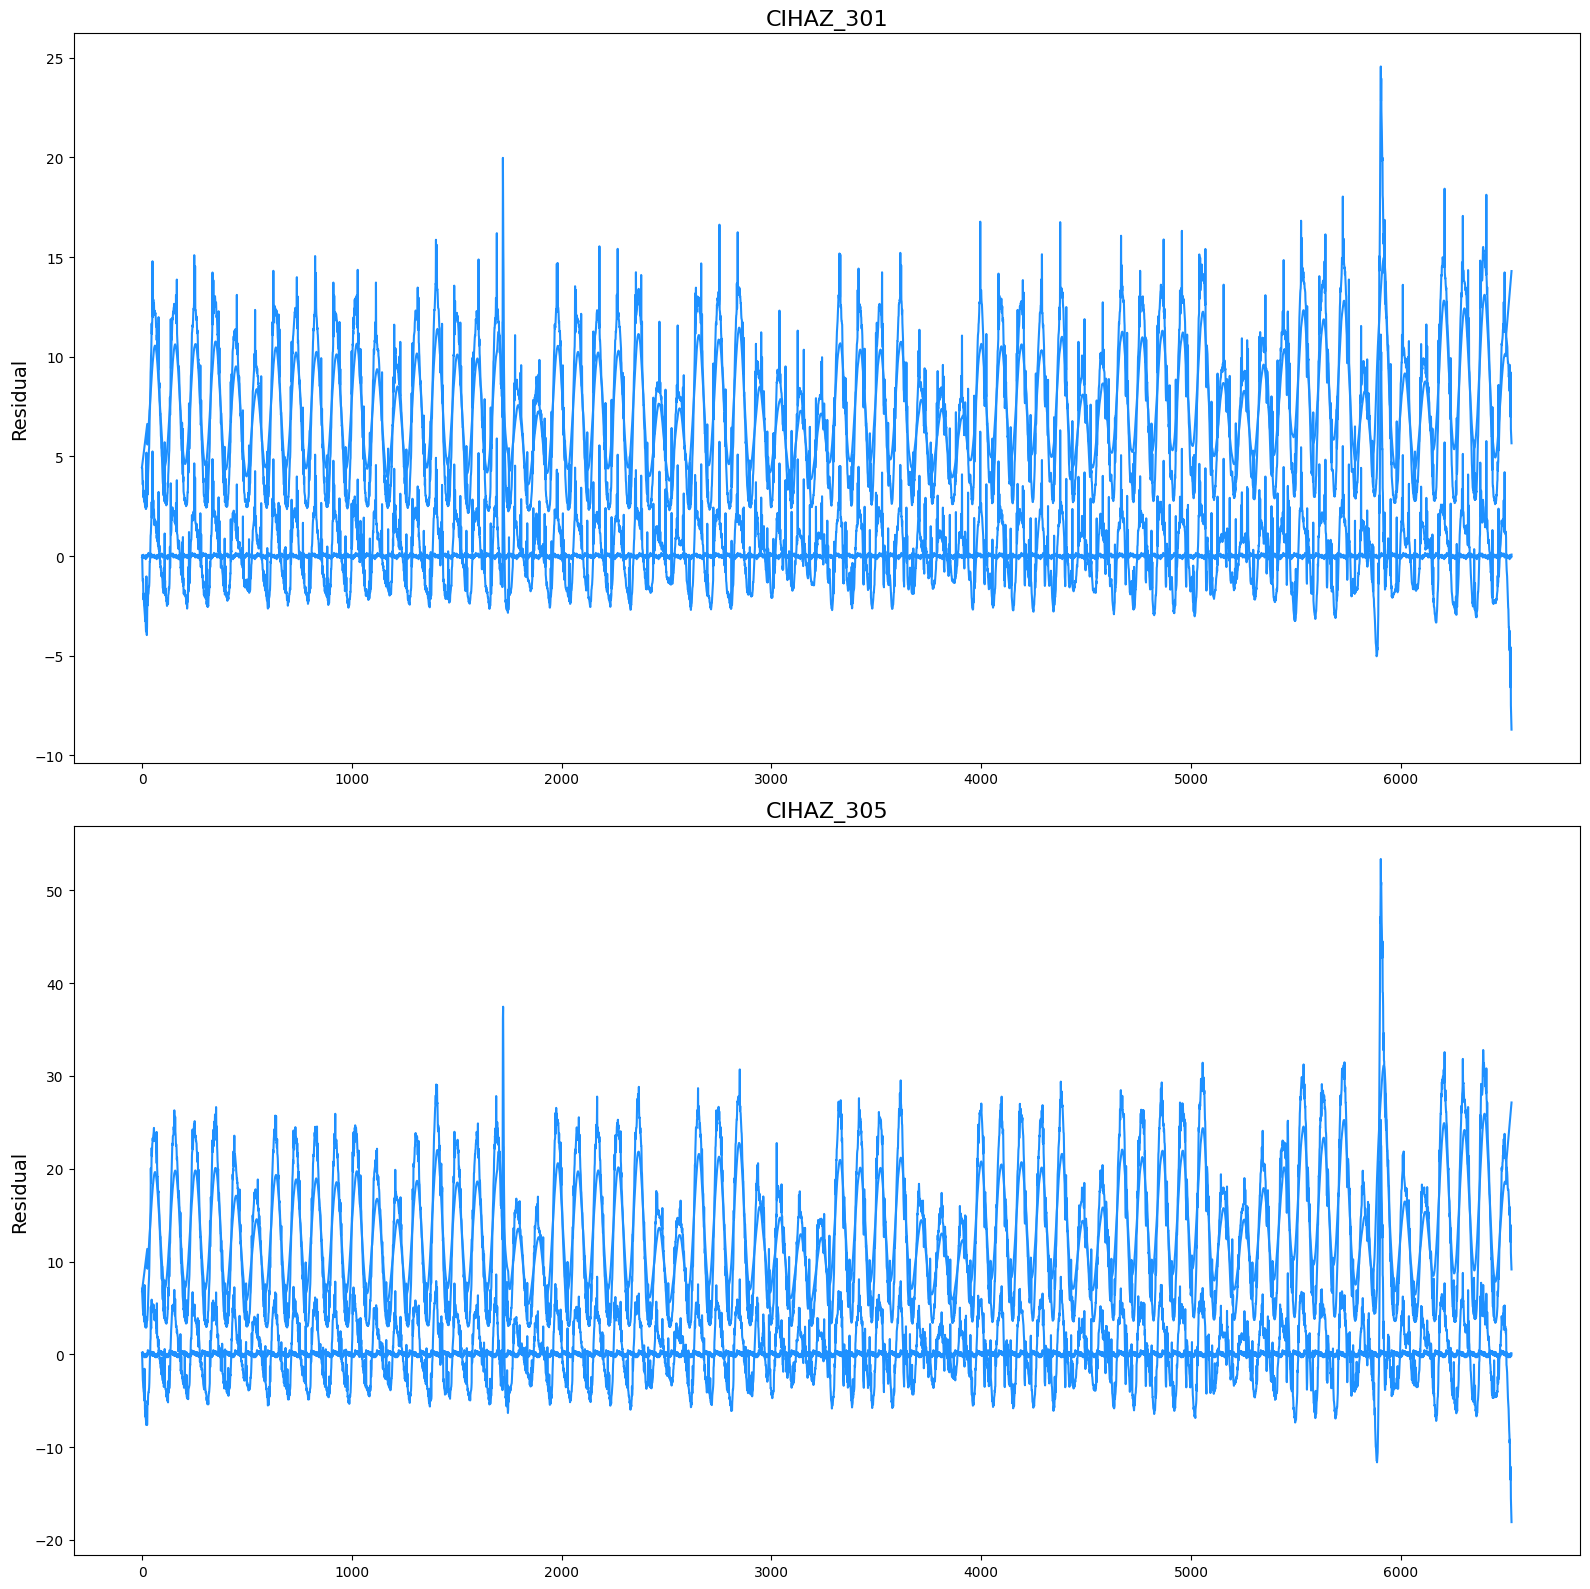

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

avg_cpu_cihaz301 = df_cihaz301.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean().reset_index()
avg_cpu_cihaz305 = df_cihaz305.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean().reset_index()

avg_cpu_cihaz301['CPULOAD'] = avg_cpu_cihaz301['CPULOAD'].interpolate()
avg_cpu_cihaz305['CPULOAD'] = avg_cpu_cihaz305['CPULOAD'].interpolate()

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))

axs[0].set_title('CIHAZ_301', fontsize=16)
res_cihaz301 = seasonal_decompose(avg_cpu_cihaz301['CPULOAD'], period=52, model='additive', extrapolate_trend='freq')
res_cihaz301.observed.plot(ax=axs[0], legend=False, color='dodgerblue')
axs[0].set_ylabel('Observed', fontsize=14)
res_cihaz301.trend.plot(ax=axs[0], legend=False, color='dodgerblue')
axs[0].set_ylabel('Trend', fontsize=14)
res_cihaz301.seasonal.plot(ax=axs[0], legend=False, color='dodgerblue')
axs[0].set_ylabel('Seasonal', fontsize=14)
res_cihaz301.resid.plot(ax=axs[0], legend=False, color='dodgerblue')
axs[0].set_ylabel('Residual', fontsize=14)

axs[1].set_title('CIHAZ_305', fontsize=16)
res_cihaz305 = seasonal_decompose(avg_cpu_cihaz305['CPULOAD'], period=52, model='additive', extrapolate_trend='freq')
res_cihaz305.observed.plot(ax=axs[1], legend=False, color='dodgerblue')
axs[1].set_ylabel('Observed', fontsize=14)
res_cihaz305.trend.plot(ax=axs[1], legend=False, color='dodgerblue')
axs[1].set_ylabel('Trend', fontsize=14)
res_cihaz305.seasonal.plot(ax=axs[1], legend=False, color='dodgerblue')
axs[1].set_ylabel('Seasonal', fontsize=14)
res_cihaz305.resid.plot(ax=axs[1], legend=False, color='dodgerblue')
axs[1].set_ylabel('Residual', fontsize=14)

plt.tight_layout()
plt.show()


# Zaman Serisi Ayrıştırma Tekniklerinin Kullanılarak Ortalama CPULOAD Değerlerinin Analiz Edilmesi

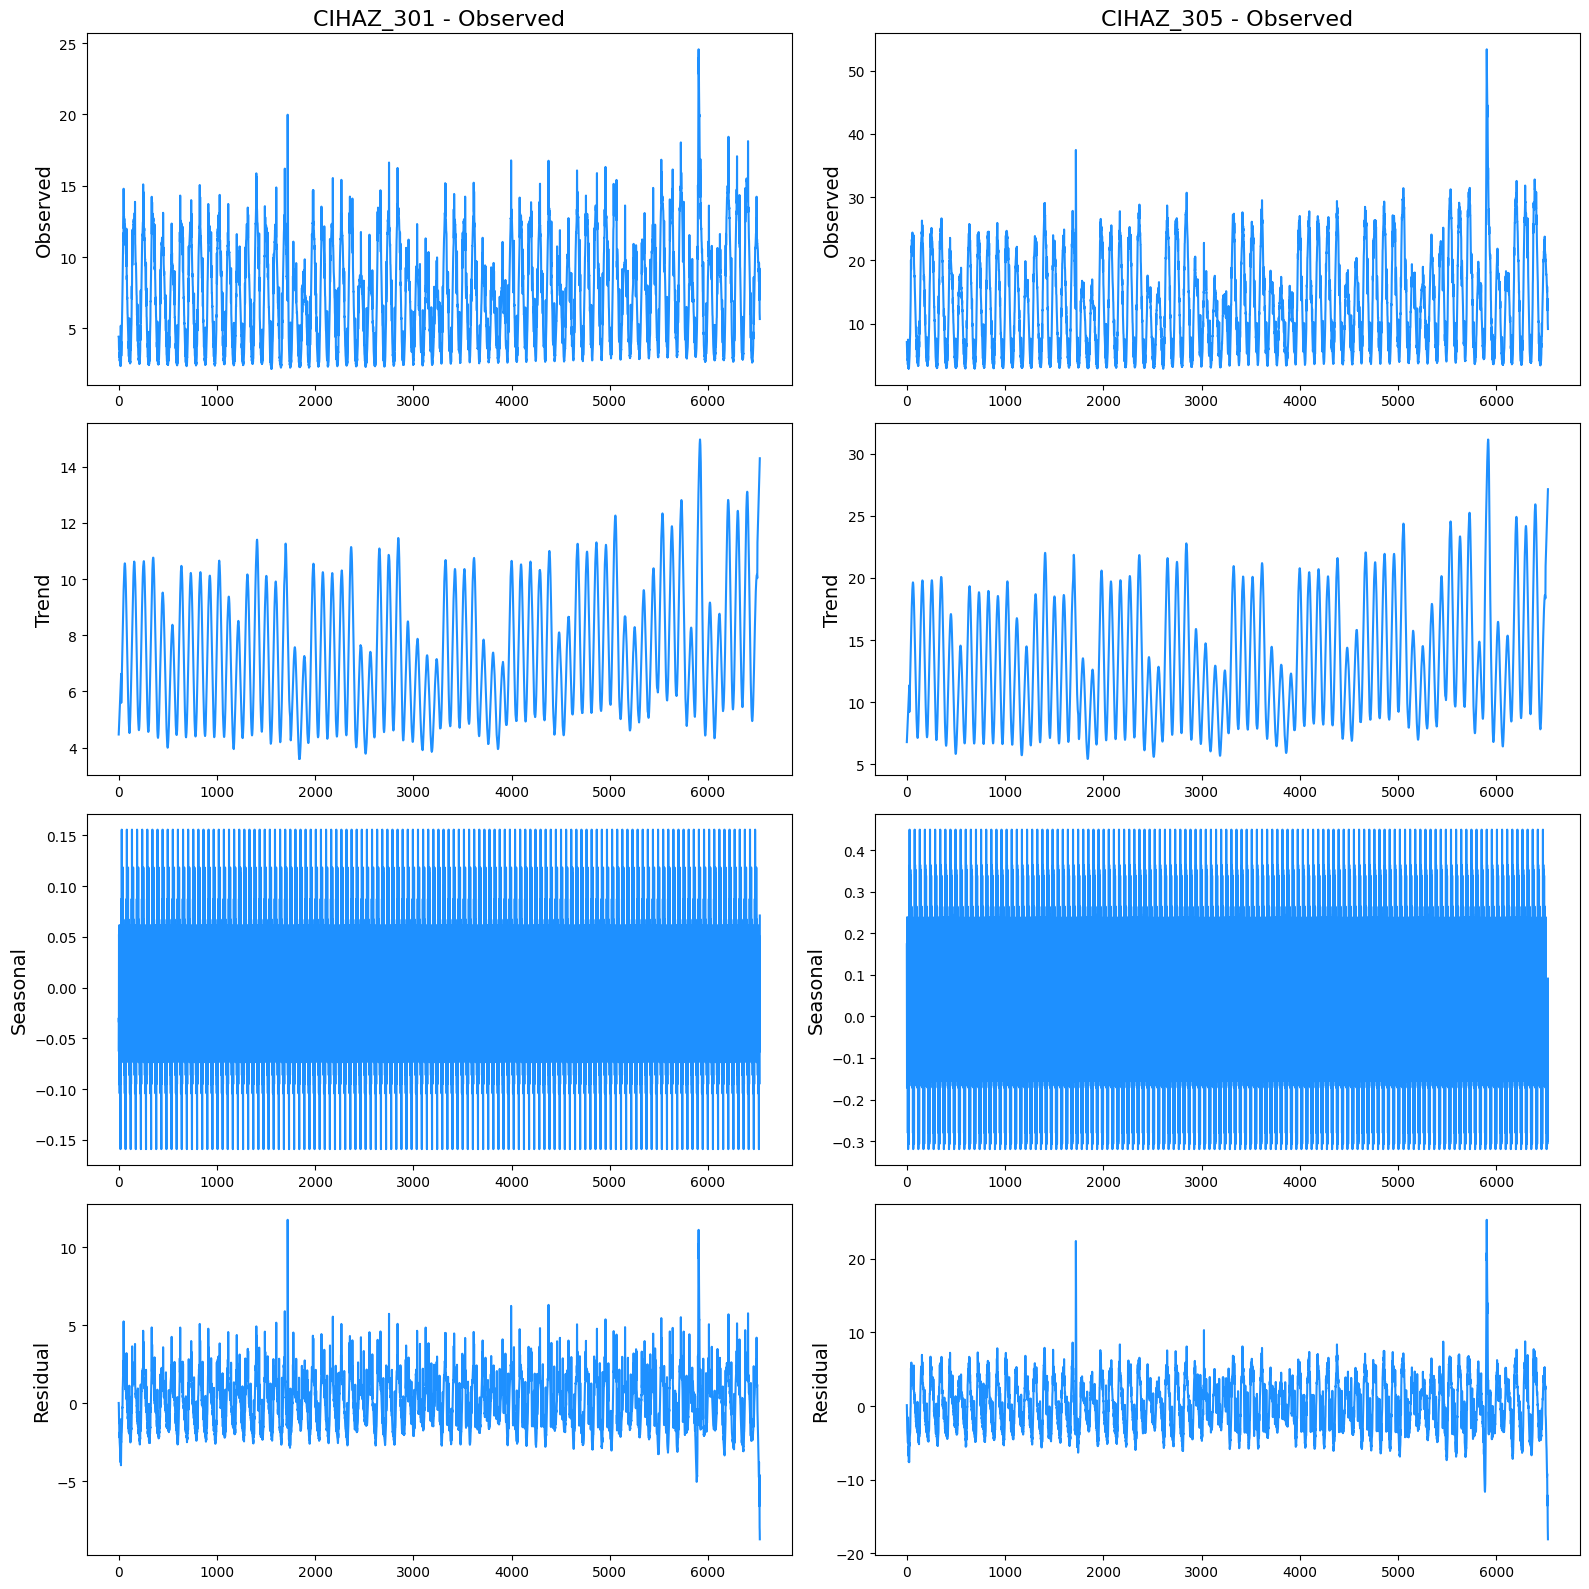

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

avg_cpu_cihaz301 = df_cihaz301.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean().reset_index()
avg_cpu_cihaz305 = df_cihaz305.groupby(pd.Grouper(freq='15Min'))['CPULOAD'].mean().reset_index()

avg_cpu_cihaz301['CPULOAD'] = avg_cpu_cihaz301['CPULOAD'].interpolate()
avg_cpu_cihaz305['CPULOAD'] = avg_cpu_cihaz305['CPULOAD'].interpolate()

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(16, 16))

axs[0, 0].set_title('CIHAZ_301 - Observed', fontsize=16)
res_cihaz301 = seasonal_decompose(avg_cpu_cihaz301['CPULOAD'], period=52, model='additive', extrapolate_trend='freq')
res_cihaz301.observed.plot(ax=axs[0, 0], legend=False, color='dodgerblue')
axs[0, 0].set_ylabel('Observed', fontsize=14)

res_cihaz301.trend.plot(ax=axs[1, 0], legend=False, color='dodgerblue')
axs[1, 0].set_ylabel('Trend', fontsize=14)

res_cihaz301.seasonal.plot(ax=axs[2, 0], legend=False, color='dodgerblue')
axs[2, 0].set_ylabel('Seasonal', fontsize=14)

res_cihaz301.resid.plot(ax=axs[3, 0], legend=False, color='dodgerblue')
axs[3, 0].set_ylabel('Residual', fontsize=14)

axs[0, 1].set_title('CIHAZ_305 - Observed', fontsize=16)
res_cihaz305 = seasonal_decompose(avg_cpu_cihaz305['CPULOAD'], period=52, model='additive', extrapolate_trend='freq')
res_cihaz305.observed.plot(ax=axs[0, 1], legend=False, color='dodgerblue')
axs[0, 1].set_ylabel('Observed', fontsize=14)

res_cihaz305.trend.plot(ax=axs[1, 1], legend=False, color='dodgerblue')
axs[1, 1].set_ylabel('Trend', fontsize=14)

res_cihaz305.seasonal.plot(ax=axs[2, 1], legend=False, color='dodgerblue')
axs[2, 1].set_ylabel('Seasonal', fontsize=14)

res_cihaz305.resid.plot(ax=axs[3, 1], legend=False, color='dodgerblue')
axs[3, 1].set_ylabel('Residual', fontsize=14)

plt.tight_layout()
plt.show()


# Trend ve Seasonal Analizlerin Yapılması

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_v2 = pd.read_csv('data/train.csv')
df_v2['DATETIME'] = pd.to_datetime(df_v2['DATETIME'])
df_v2 = df_v2.set_index('DATETIME')

df_cihaz301 = df_v2[df_v2['SERVER'] == 'CIHAZ_301']
df_cihaz305 = df_v2[df_v2['SERVER'] == 'CIHAZ_305']

df_avg_cihaz301 = df_cihaz301.groupby(['SERVER', 'CPU', pd.Grouper(freq='15Min')]).mean().reset_index()
df_avg_cihaz305 = df_cihaz305.groupby(['SERVER', 'CPU', pd.Grouper(freq='15Min')]).mean().reset_index()

df_results = pd.DataFrame()

for i in range(24):
    avg_cpu_cihaz301 = df_avg_cihaz301[df_avg_cihaz301['CPU'] == f'CPU-{i}']['CPULOAD']
    avg_cpu_cihaz305 = df_avg_cihaz305[df_avg_cihaz305['CPU'] == f'CPU-{i}']['CPULOAD']
    
    decomp_cihaz301 = seasonal_decompose(avg_cpu_cihaz301, period=52, model='additive', extrapolate_trend='freq')
    df_avg_cihaz301[f"CPULOAD_trend_CPU-{i}"] = decomp_cihaz301.trend
    df_avg_cihaz301[f"CPULOAD_seasonal_CPU-{i}"] = decomp_cihaz301.seasonal

    decomp_cihaz305 = seasonal_decompose(avg_cpu_cihaz305, period=52, model='additive', extrapolate_trend='freq')
    df_avg_cihaz305[f"CPULOAD_trend_CPU-{i}"] = decomp_cihaz305.trend
    df_avg_cihaz305[f"CPULOAD_seasonal_CPU-{i}"] = decomp_cihaz305.seasonal

df_results = pd.concat([df_avg_cihaz301, df_avg_cihaz305])

# Sonuçları görüntüle
df_results[['SERVER', 'CPU', 'CPULOAD', 'CPULOAD_trend_CPU-0', 'CPULOAD_seasonal_CPU-0']].head().style.set_properties(subset=['CPULOAD_trend_CPU-0', 'CPULOAD_seasonal_CPU-0'], **{'background-color': 'dodgerblue'})


,SERVER,CPU,CPULOAD,CPULOAD_trend_CPU-0,CPULOAD_seasonal_CPU-0
0,CIHAZ_301,CPU-0,3.880000,4.073698,0.225902
1,CIHAZ_301,CPU-0,3.920000,4.197947,0.313635
2,CIHAZ_301,CPU-0,3.620000,4.322197,0.017191
3,CIHAZ_301,CPU-0,3.070000,4.446446,0.473455
4,CIHAZ_301,CPU-0,3.110000,4.570696,0.330689


In [35]:
df_v2.head()

,SERVER,CPU,CPULOAD
DATETIME,,,
2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-0,3.88
2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-1,11.33
2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-10,5.31
2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-11,5.25
2020-03-24 00:00:00+03:00,CIHAZ_301,CPU-12,0.28


# TimeSeriesSplit Yöntemiyle Cross Validation Yapılması

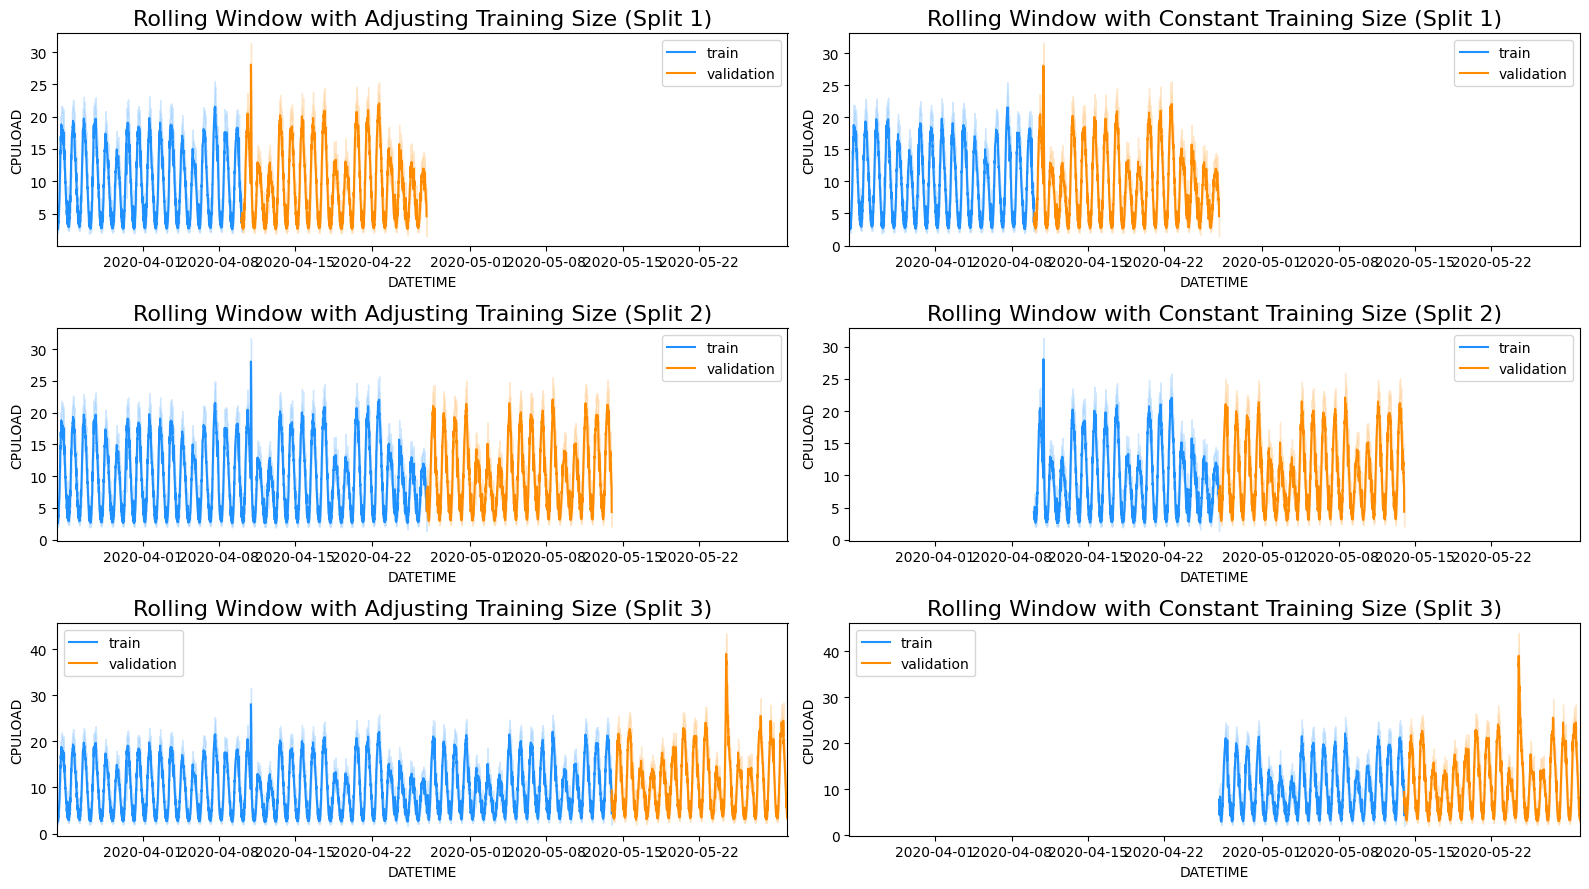

In [13]:
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

N_SPLITS = 3

# X ve y değişkenlerinin belirlenmesi
X = df_v2.index
y = df_v2['CPULOAD']

# Zaman serisi çapraz doğrulama
folds = TimeSeriesSplit(n_splits=N_SPLITS)

f, ax = plt.subplots(nrows=N_SPLITS, ncols=2, figsize=(16, 9))

for i, (train_index, valid_index) in enumerate(folds.split(X)):
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    sns.lineplot(x= X_train, y= y_train, ax=ax[i,0], color='dodgerblue', label='train')
    sns.lineplot(x= X_train[-len(X_valid):], 
                 y= y_train[-len(X_valid):], 
                 ax=ax[i,1], color='dodgerblue', label='train')

    for j in range(2):
        sns.lineplot(x= X_valid, y= y_valid, ax=ax[i, j], color='darkorange', label='validation')
    ax[i, 0].set_title(f"Rolling Window with Adjusting Training Size (Split {i+1})", fontsize=16)
    ax[i, 1].set_title(f"Rolling Window with Constant Training Size (Split {i+1})", fontsize=16)

for i in range(N_SPLITS):
    ax[i, 0].set_xlim([date(2020, 3, 24), date(2020, 5, 30)])
    ax[i, 1].set_xlim([date(2020, 3, 24), date(2020, 5, 30)])

plt.tight_layout()
plt.show()


# Model Geliştirme

In [18]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder nesnesi oluşturulur
encoder = LabelEncoder()

# 'SERVER' ve 'CPU' sütunları için Label Encoder'ı uygula
df_v2['SERVER'] = encoder.fit_transform(df_v2['SERVER'])
df_v2['CPU'] = encoder.fit_transform(df_v2['CPU'])


In [20]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from pytz import timezone

# Sunucuların isimlerini al
servers = df_v2['SERVER'].unique()

# Hedef tarihi belirle
target_date = pd.date_range('2020-05-31 00:00', '2020-05-31 23:59', freq='15T', tz='UTC')

# Tahminleri saklayacak boş bir liste oluştur
predictions = []

# Her bir sunucu için
for server in servers:
    # Sunucuya özgü verileri al
    df_server = df_v2[df_v2['SERVER'] == server]

    # CPULOAD değerlerini gruplayarak ortalama al
    df_avg = df_server.groupby(df_server.index).mean()['CPULOAD']

    # Verilerin frekansını 15 dakikalık olarak ayarla
    df_avg = df_avg.asfreq('15T')

    # Eğitim veri setini belirleme
    train_data = df_avg[df_avg.index < target_date[0].tz_convert('UTC')]
    
    # ARIMA modeli uygulama
    model = ARIMA(train_data, order=(1, 1, 1))
    model_fit = model.fit()

    # Hedef tarih için tahmin yapma
    for date in target_date:
        forecast = model_fit.forecast(steps=1)

        # Tahmini saklama
        predictions.append(forecast[0])

# Tahminleri DataFrame'e dönüştürme ve sadece 'CPULOAD_PRED' sütununu yazdırma
predictions_df = pd.DataFrame(predictions, columns=['CPULOAD_PRED'])

# Tahminleri yazdırma
print(predictions_df)


     CPULOAD_PRED
0         5.78431
1         5.78431
2         5.78431
3         5.78431
4         5.78431
..            ...
187       9.01015
188       9.01015
189       9.01015
190       9.01015
191       9.01015

[192 rows x 1 columns]
